In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
orders = pd.read_csv('orders.csv' )
order_products_train = pd.read_csv('order_products__train.csv')
order_products_prior = pd.read_csv('order_products__prior.csv')
products = pd.read_csv('products.csv')
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')

In [4]:
order_priors = orders.merge(order_products_prior, on='order_id', how='inner')

In [5]:
order_priors['days_since_prior_order'] = order_priors['days_since_prior_order'].fillna(order_priors['days_since_prior_order'].median())

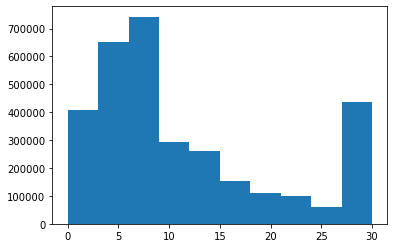

In [5]:
_ = plt.hist(orders['days_since_prior_order'])

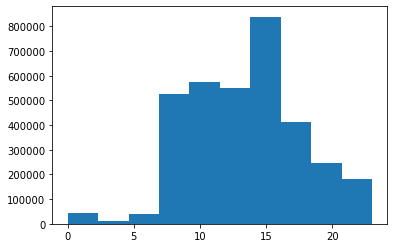

In [6]:
_ = plt.hist(orders['order_hour_of_day'])

In [16]:
#_ = plt.hist(orders['order_dow'])

In [6]:
order_priors.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,prior,1,2,8,8.0,196,1,0
1,2539329,1,prior,1,2,8,8.0,14084,2,0
2,2539329,1,prior,1,2,8,8.0,12427,3,0
3,2539329,1,prior,1,2,8,8.0,26088,4,0
4,2539329,1,prior,1,2,8,8.0,26405,5,0


In [12]:
col = ['order_dow','order_hour_of_day','days_since_prior_order','reordered','add_to_cart_order']
order_feats = order_priors[col]


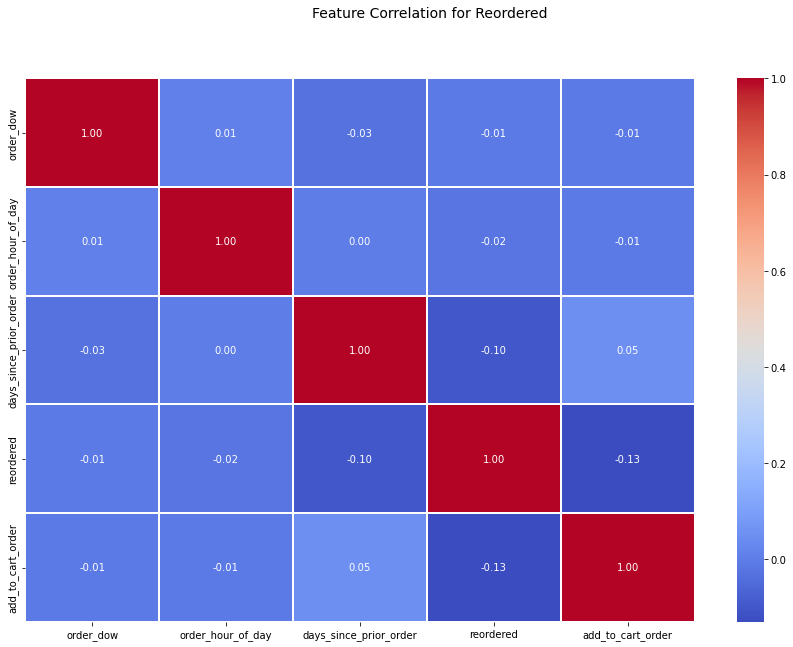

In [15]:
corr = order_feats.corr()
f, ax = plt.subplots(figsize=(15, 10))
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.1)
#f.subplots_adjust(top=0.93)
t= f.suptitle('Feature Correlation for Reordered', fontsize=14)